In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [0]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [0]:
np.random.seed(10) #seed 정해줌으로써 랜덤 노이즈가 고정 됨
random_dim = 100 #랜덤 노이즈 차원 수

In [0]:
def data_load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train = (x_train.astype(np.float32) - 127.5) / 127.5 # -1~1의 값으로 변경
  x_train = x_train.reshape(60000, 784) #28x28 사이즈 이미지를 일렬로 펼침

  return x_train

In [0]:
def get_optimizer():
  return Adam(lr=0.0002, beta_1=0.9)

In [0]:
def make_generator(optimizer):
  generator = Sequential()
  
  generator.add(Dense(256, input_dim = random_dim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(512))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(1024))
  generator.add(LeakyReLU(0.2))
  
  generator.add(Dense(784, activation='tanh')) #마지막 값을 -1~1 사이로 출력하도록
  
  generator.compile(loss='binary_crossentropy', optimizer=optimizer)
  
  return generator

In [0]:
def make_discriminator(optimizer):
  discriminator = Sequential()
  
  discriminator.add(Dense(1024, input_dim = 784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))
  
  discriminator.add(Dense(512))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))

  discriminator.add(Dense(256))
  discriminator.add(LeakyReLU(0.2))
  discriminator.add(Dropout(0.3))

  discriminator.add(Dense(1, activation='sigmoid'))

  discriminator.compile(loss = 'binary_crossentropy', optimizer=optimizer)

  return discriminator


In [0]:
def make_gan_network(discriminator, generator, random_dim, optimizer):

  discriminator.trainable = False #generator 학습시엔 discriminator 학습 멈춰줌
  gan_input = Input(shape=(random_dim,))
  x = generator(gan_input) #(784, )의 배열값을 출력
  gan_output = discriminator(x) #generator가 생성한 값에 대한 discriminator의 판정

  gan = Model(inputs= gan_input, outputs = gan_output)
  gan.compile(loss='binary_crossentropy', optimizer=optimizer)

  return gan

In [0]:
#100개씩 이미지 모아서 출력
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
  noise = np.random.normal(0,1,size=[examples, random_dim])
  generated_images = generator.predict(noise) #(100,100)->(100,784)로 출력
  generated_images = generated_images.reshape(examples, 28, 28)

  plt.figure(figsize=figsize)
  for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i],cmap='gray', interpolation='nearest')
    plt.axis('off')
  plt.tight_layout()
  plt.savefig('gan_generated_{}.png'.format(epoch))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


  0%|          | 0/468 [00:00<?, ?it/s]

--------------- Epoch 1 ---------------










  2%|▏         | 8/468 [00:00<00:05, 77.30it/s]

--------------- Epoch 2 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.17it/s]

--------------- Epoch 3 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.17it/s]

--------------- Epoch 4 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.46it/s]

--------------- Epoch 5 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.40it/s]

--------------- Epoch 6 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.98it/s]

--------------- Epoch 7 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.78it/s]

--------------- Epoch 8 ---------------


  2%|▏         | 9/468 [00:00<00:05, 88.87it/s]

--------------- Epoch 9 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.57it/s]

--------------- Epoch 10 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.10it/s]

--------------- Epoch 11 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.59it/s]

--------------- Epoch 12 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.98it/s]

--------------- Epoch 13 ---------------


  2%|▏         | 9/468 [00:00<00:05, 86.88it/s]

--------------- Epoch 14 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.74it/s]

--------------- Epoch 15 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.29it/s]

--------------- Epoch 16 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.73it/s]

--------------- Epoch 17 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.32it/s]

--------------- Epoch 18 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.35it/s]

--------------- Epoch 19 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.07it/s]

--------------- Epoch 20 ---------------


  1%|▏         | 7/468 [00:00<00:07, 58.69it/s]

--------------- Epoch 21 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.26it/s]

--------------- Epoch 22 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.82it/s]

--------------- Epoch 23 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.57it/s]

--------------- Epoch 24 ---------------


  2%|▏         | 9/468 [00:00<00:05, 86.57it/s]

--------------- Epoch 25 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.77it/s]

--------------- Epoch 26 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.15it/s]

--------------- Epoch 27 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.66it/s]

--------------- Epoch 28 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.73it/s]

--------------- Epoch 29 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.61it/s]

--------------- Epoch 30 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.16it/s]

--------------- Epoch 31 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.82it/s]

--------------- Epoch 32 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.93it/s]

--------------- Epoch 33 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.20it/s]

--------------- Epoch 34 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.80it/s]

--------------- Epoch 35 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.89it/s]

--------------- Epoch 36 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.33it/s]

--------------- Epoch 37 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.93it/s]

--------------- Epoch 38 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.47it/s]

--------------- Epoch 39 ---------------


  2%|▏         | 9/468 [00:00<00:05, 87.21it/s]

--------------- Epoch 40 ---------------


  1%|▏         | 7/468 [00:00<00:06, 69.19it/s]

--------------- Epoch 41 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.03it/s]

--------------- Epoch 42 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.42it/s]

--------------- Epoch 43 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.72it/s]

--------------- Epoch 44 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.53it/s]

--------------- Epoch 45 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.71it/s]

--------------- Epoch 46 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.20it/s]

--------------- Epoch 47 ---------------


  2%|▏         | 9/468 [00:00<00:05, 87.81it/s]

--------------- Epoch 48 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.59it/s]

--------------- Epoch 49 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.07it/s]

--------------- Epoch 50 ---------------


  2%|▏         | 8/468 [00:00<00:06, 72.02it/s]

--------------- Epoch 51 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.25it/s]

--------------- Epoch 52 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.90it/s]

--------------- Epoch 53 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.66it/s]

--------------- Epoch 54 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.98it/s]

--------------- Epoch 55 ---------------


  2%|▏         | 9/468 [00:00<00:05, 89.88it/s]

--------------- Epoch 56 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.74it/s]

--------------- Epoch 57 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.67it/s]

--------------- Epoch 58 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.35it/s]

--------------- Epoch 59 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.30it/s]

--------------- Epoch 60 ---------------


  2%|▏         | 9/468 [00:00<00:05, 80.64it/s]

--------------- Epoch 61 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.96it/s]

--------------- Epoch 62 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.31it/s]

--------------- Epoch 63 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.31it/s]

--------------- Epoch 64 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.55it/s]

--------------- Epoch 65 ---------------


  2%|▏         | 9/468 [00:00<00:05, 80.96it/s]

--------------- Epoch 66 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.88it/s]

--------------- Epoch 67 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.15it/s]

--------------- Epoch 68 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.43it/s]

--------------- Epoch 69 ---------------


  2%|▏         | 9/468 [00:00<00:05, 88.36it/s]

--------------- Epoch 70 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.06it/s]

--------------- Epoch 71 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.55it/s]

--------------- Epoch 72 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.86it/s]

--------------- Epoch 73 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.31it/s]

--------------- Epoch 74 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.74it/s]

--------------- Epoch 75 ---------------


  2%|▏         | 8/468 [00:00<00:05, 78.65it/s]

--------------- Epoch 76 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.20it/s]

--------------- Epoch 77 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.71it/s]

--------------- Epoch 78 ---------------


  2%|▏         | 8/468 [00:00<00:06, 76.58it/s]

--------------- Epoch 79 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.62it/s]

--------------- Epoch 80 ---------------


  2%|▏         | 9/468 [00:00<00:05, 83.62it/s]

--------------- Epoch 81 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.71it/s]

--------------- Epoch 82 ---------------


  2%|▏         | 8/468 [00:00<00:05, 77.01it/s]

--------------- Epoch 83 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.11it/s]

--------------- Epoch 84 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.46it/s]

--------------- Epoch 85 ---------------


  2%|▏         | 9/468 [00:00<00:05, 82.37it/s]

--------------- Epoch 86 ---------------


  2%|▏         | 8/468 [00:00<00:06, 71.84it/s]

--------------- Epoch 87 ---------------


  2%|▏         | 8/468 [00:00<00:05, 79.02it/s]

--------------- Epoch 88 ---------------


  2%|▏         | 8/468 [00:00<00:06, 74.71it/s]

--------------- Epoch 89 ---------------


  2%|▏         | 8/468 [00:00<00:06, 73.70it/s]

--------------- Epoch 90 ---------------


  1%|▏         | 7/468 [00:00<00:06, 67.72it/s]

--------------- Epoch 91 ---------------


  2%|▏         | 8/468 [00:00<00:06, 75.02it/s]

--------------- Epoch 92 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.80it/s]

--------------- Epoch 93 ---------------


  2%|▏         | 9/468 [00:00<00:05, 81.62it/s]

--------------- Epoch 94 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.47it/s]

--------------- Epoch 95 ---------------


  2%|▏         | 9/468 [00:00<00:05, 78.34it/s]

--------------- Epoch 96 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.96it/s]

--------------- Epoch 97 ---------------


  2%|▏         | 9/468 [00:00<00:05, 86.53it/s]

--------------- Epoch 98 ---------------


  2%|▏         | 9/468 [00:00<00:05, 84.42it/s]

--------------- Epoch 99 ---------------


  2%|▏         | 9/468 [00:00<00:05, 85.40it/s]

--------------- Epoch 100 ---------------


100%|██████████| 468/468 [00:06<00:00, 77.21it/s]


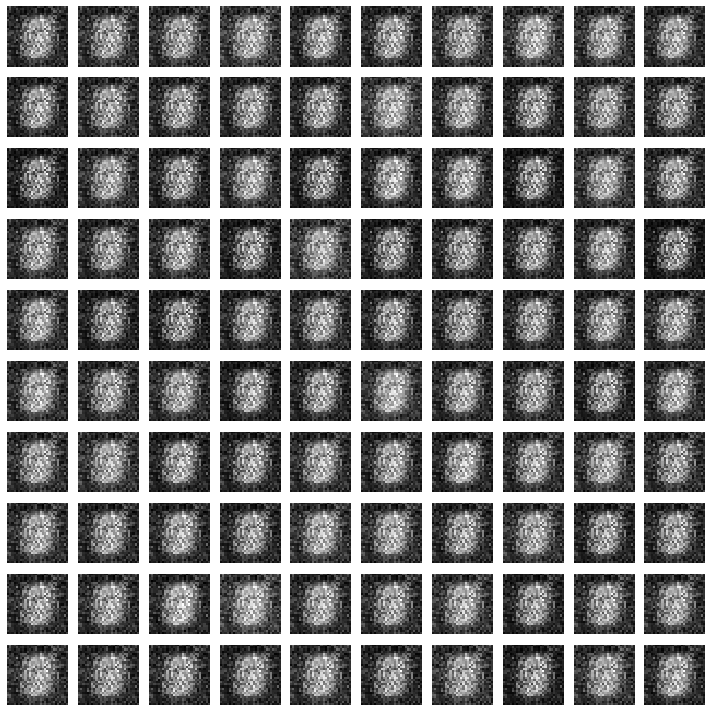

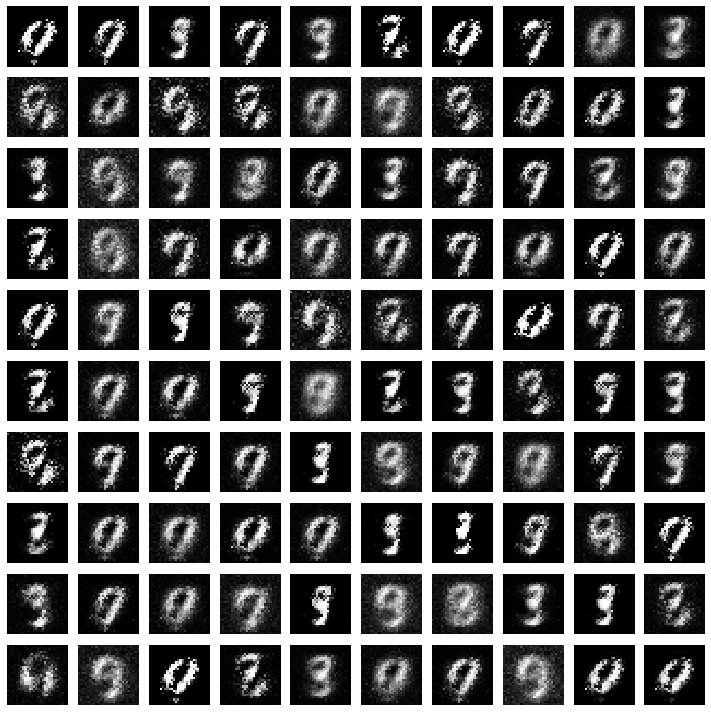

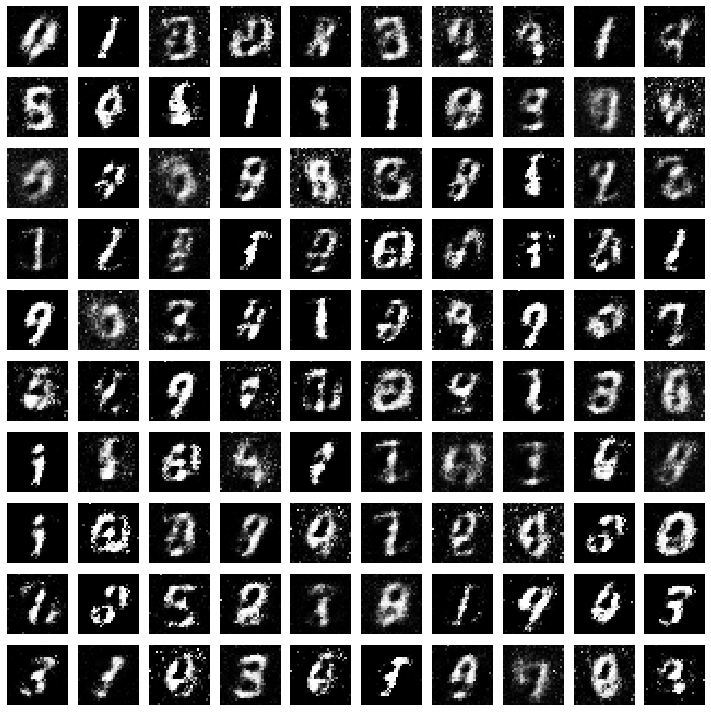

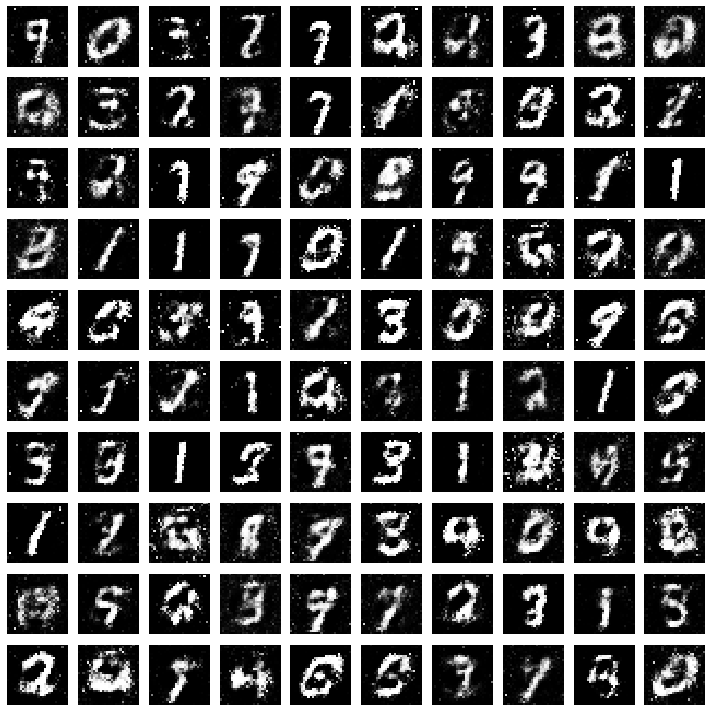

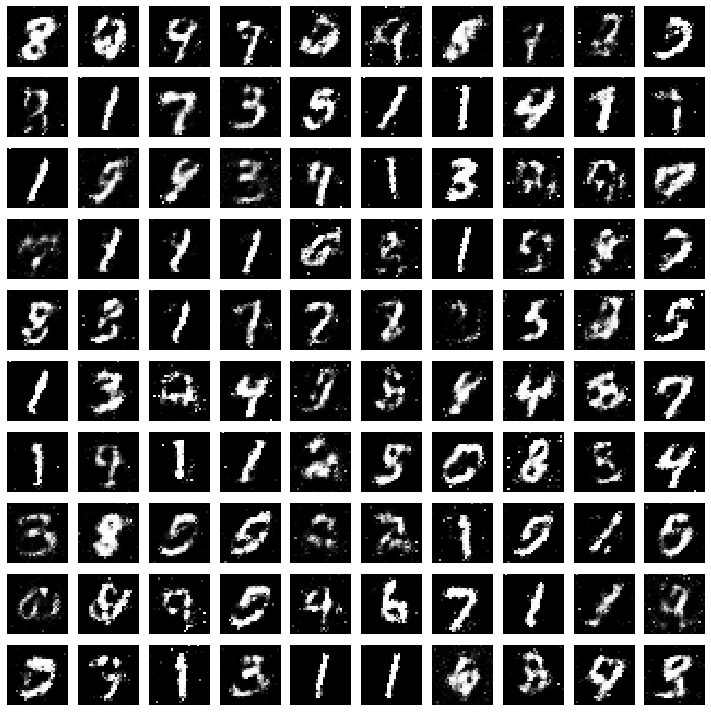

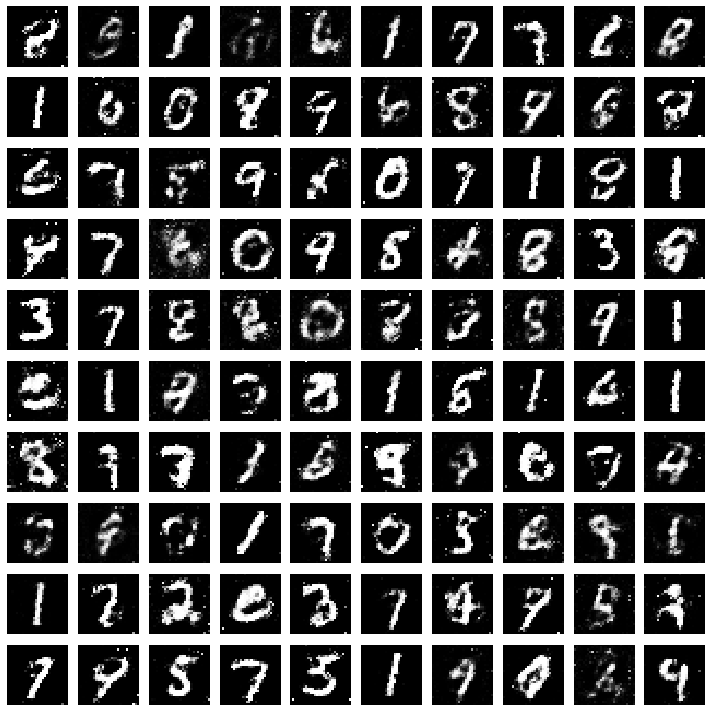

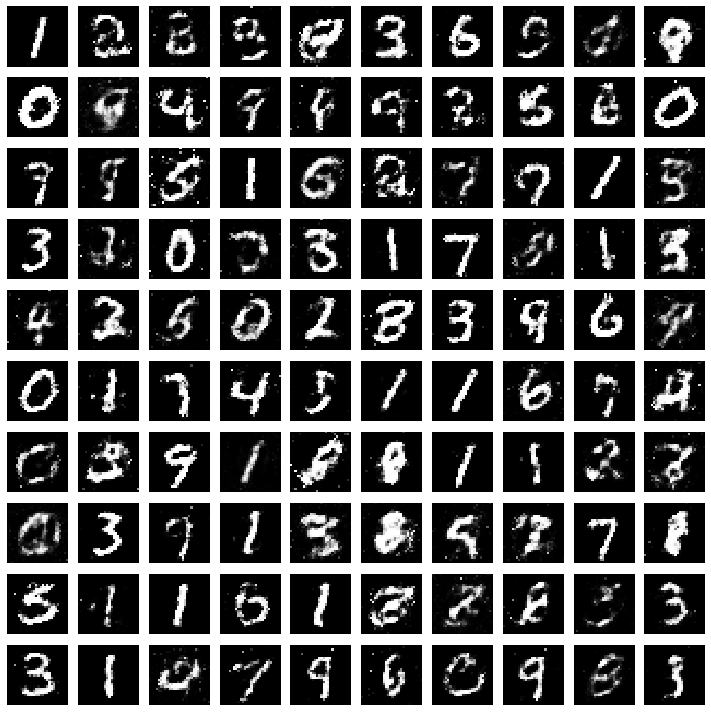

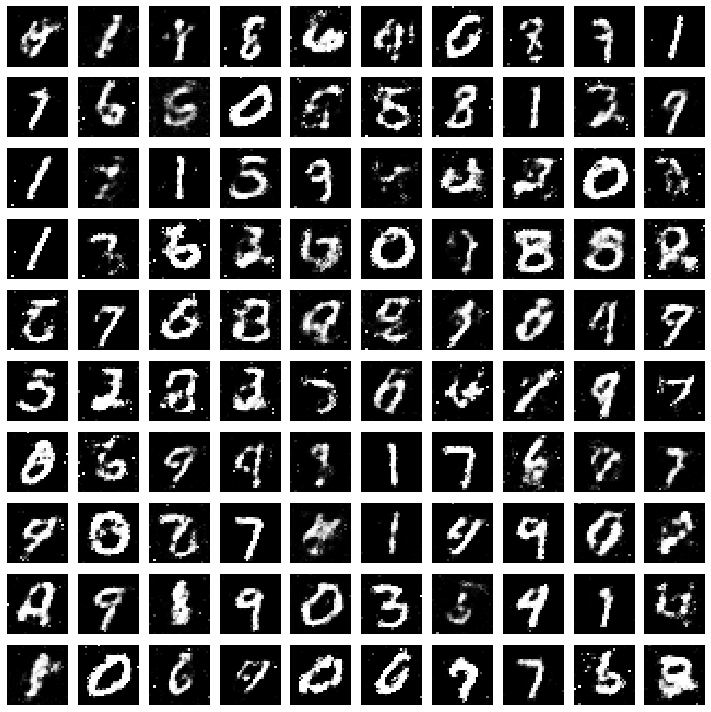

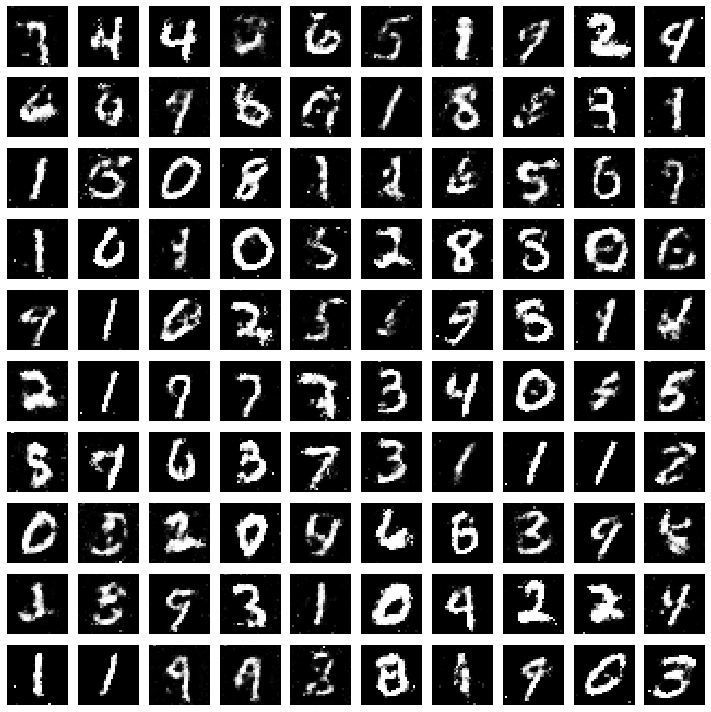

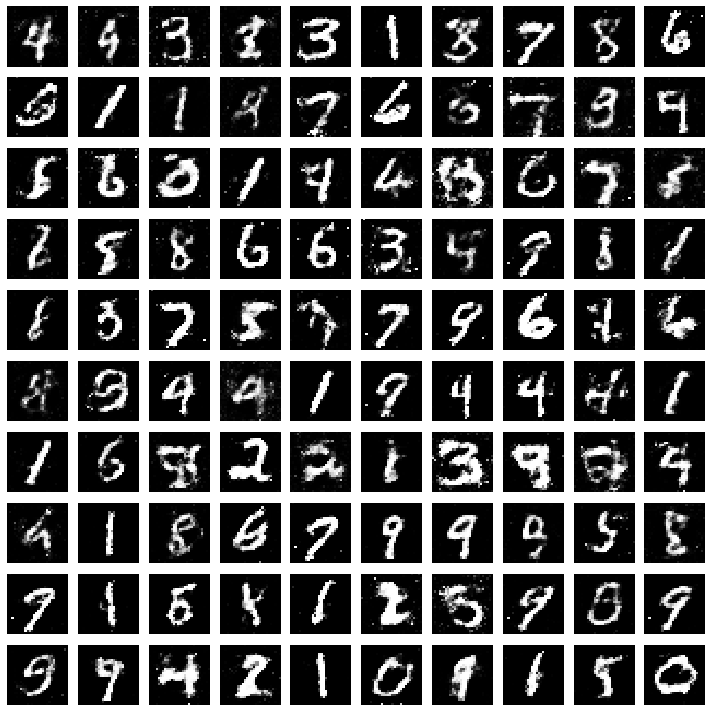

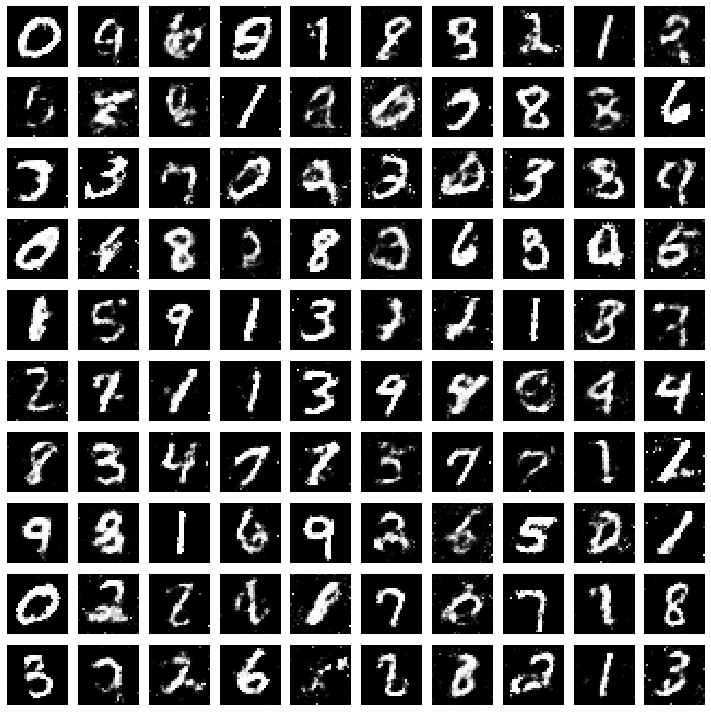

In [11]:
epochs = 100
batch_size = 128
x_train = data_load_mnist()
batch_count = x_train.shape[0] // batch_size
adam = get_optimizer()
generator = make_generator(adam)
discriminator = make_discriminator(adam)
gan = make_gan_network(discriminator, generator, random_dim, adam)

for e in range(1, epochs+1):
  print('-'*15, 'Epoch %d'%e, '-'*15)
  for i in tqdm(range(batch_count)):
      noise = np.random.normal(0,1,size=[batch_size, random_dim])
      image_batch = x_train[np.random.randint(0, x_train.shape[0], 128)]
      generated_images = generator.predict(noise)
      X = np.concatenate([image_batch, generated_images])
      
      y_dis = np.zeros(2*batch_size)
      y_dis[:batch_size] = 0.9
      
      discriminator.trainable = True
      discriminator.train_on_batch(X, y_dis)

      noise = np.random.normal(0,1, size=(batch_size, random_dim))
      y_gen = np.ones(batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y_gen)
  if e == 1 or e % 10 == 0:
      plot_generated_images(e, generator)







In [0]:
noise_wild = np.random.normal(0,1,size=(10, 100))
gene_images = generator.predict(noise_wild)

In [0]:
gene_images = gene_images.reshape(10,28,28)
def denorm(imgs):
  denorm_imgs = (imgs.astype(np.float32) * 127.5) + 127.5
  return denorm_imgs

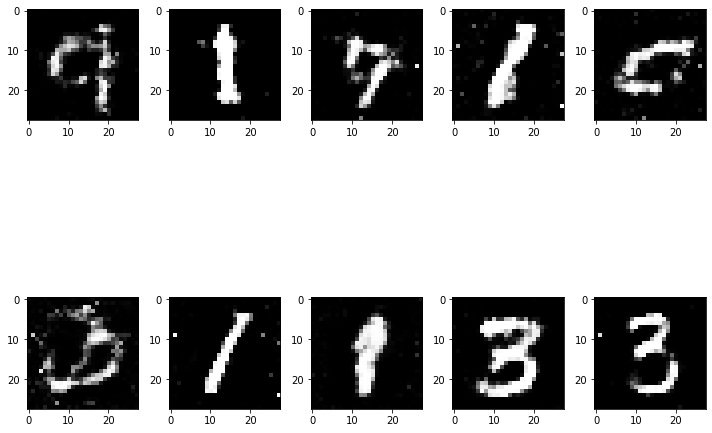

In [27]:
denorm_imgs = denorm(gene_images)
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(denorm_imgs[i], cmap='gray')
plt.tight_layout()